In [120]:
#|default_exp app

In [115]:
#|export
from fastai.vision.all import *
import gradio as gr

def is_cat(x):
    return x[0].isupper()

In [6]:
from duckduckgo_search import DDGS

def search_images(keywords, max_images = 30):
    print(f"Searching for {keywords}")
    return L(DDGS().images(keywords,max_results=max_images)).itemgot('image')

In [14]:
urls = search_images('dog')
urls[0]

Searching for dog


'https://wallpaperaccess.com/full/2565248.jpg'

In [15]:
from fastdownload import download_url
dest = 'dog.jpg'
download_url(urls[0], dest, show_progress=False)

Path('dog.jpg')

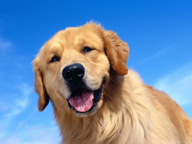

In [16]:
im = PILImage.create('dog.jpg')
im.thumbnail((192,192))
im

Searching for cat


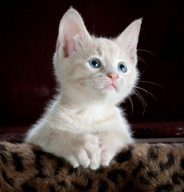

In [74]:
urls = search_images('cat')
urls[0]
dest = 'cat.jpg'
download_url(urls[0], dest, show_progress=False)

im = PILImage.create('cat.jpg')
im.thumbnail((192,192))
im

Searching for lion


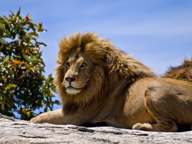

In [75]:
urls = search_images('lion')
urls[0]
dest = 'lion.jpg'
download_url(urls[0], dest, show_progress=False)

im = PILImage.create('lion.jpg')
im.thumbnail((192,192))
im

In [116]:
#|export
import pathlib
temp = pathlib.PosixPath
pathlib.PosixPath = pathlib.WindowsPath

learn = load_learner('model.pkl')

In [76]:
%time learn.predict(im)

CPU times: total: 422 ms
Wall time: 524 ms


('False', tensor(0), tensor([1.0000e+00, 3.1600e-06]))

In [117]:
#|export
categories = ('Dog', 'Cat')

def classify_image(img):
    pred, idx, probs = learn.predict(img)
    return dict(zip(categories, map(float, probs)))

In [32]:
dict(zip(categories, map(float, learn.predict(im)[2])))

{'Dog': 0.999983549118042, 'Cat': 1.647647877689451e-05}

In [36]:
classify_image(im)

{'Dog': 0.999983549118042, 'Cat': 1.647647877689451e-05}

In [118]:
#|export
# Create an image input component without specifying the shape
image = gr.Image()
label = gr.Label()
examples = ['dog.jpg', 'lion.jpg']

intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

Running on local URL:  http://127.0.0.1:7879

To create a public link, set `share=True` in `launch()`.


In [79]:
m = learn.model

In [80]:
ps = list(m.parameters())

In [84]:
ps[1]

Parameter containing:
tensor([ 2.3479e-01,  2.6633e-01, -5.1096e-08,  5.1822e-01,  3.4404e-09,
         2.2329e-01,  4.2253e-01,  1.3153e-07,  2.5038e-01,  1.5152e-06,
         3.1576e-01,  2.4897e-01,  3.7891e-01,  1.0862e-05,  2.7599e-01,
         2.3721e-01,  2.4311e-01,  3.9358e-01,  4.6939e-01,  2.9096e-01,
         2.7184e-01,  2.7946e-01,  2.8987e-01,  2.0546e-01,  2.5888e-01,
         2.7974e-01,  2.9136e-01,  3.1676e-01,  3.8977e-01,  3.0506e-01,
         2.6802e-01,  2.0998e-01,  2.8815e-01,  3.3185e-01,  4.2700e-01,
         3.7206e-01,  7.4804e-08,  1.9121e-01,  1.4740e-08,  2.2312e-01,
         1.7979e-01,  2.4838e-01,  2.7524e-01,  2.5680e-01,  2.9390e-01,
         3.0056e-01,  2.2238e-01,  2.6120e-01,  2.2001e-08,  2.6610e-01,
         2.2028e-01,  2.8474e-01,  3.3053e-01,  2.2565e-01,  3.6684e-01,
         2.1248e-01,  2.3984e-01,  2.4933e-01,  5.2661e-01,  2.4796e-01,
         2.9640e-01,  2.5811e-01,  4.8274e-01,  2.6627e-01],
       requires_grad=True)

In [87]:
ps[1].shape

torch.Size([64])

In [85]:
ps[0]

Parameter containing:
tensor([[[[-1.0309e-02, -6.0456e-03, -1.7137e-03,  ...,  5.6670e-02,
            1.7157e-02, -1.2636e-02],
          [ 1.1196e-02,  9.6276e-03, -1.0980e-01,  ..., -2.7117e-01,
           -1.2899e-01,  3.7943e-03],
          [-6.8147e-03,  5.9208e-02,  2.9559e-01,  ...,  5.1978e-01,
            2.5640e-01,  6.3627e-02],
          ...,
          [-2.7463e-02,  1.6123e-02,  7.2688e-02,  ..., -3.3279e-01,
           -4.2052e-01, -2.5777e-01],
          [ 3.0653e-02,  4.1000e-02,  6.2915e-02,  ...,  4.1387e-01,
            3.9361e-01,  1.6609e-01],
          [-1.3714e-02, -3.6532e-03, -2.4049e-02,  ..., -1.5071e-01,
           -8.2262e-02, -5.7932e-03]],

         [[-1.1219e-02, -2.6458e-02, -3.4481e-02,  ...,  3.2637e-02,
            7.9881e-04, -2.5638e-02],
          [ 4.5855e-02,  3.3762e-02, -1.0435e-01,  ..., -3.1241e-01,
           -1.6038e-01, -1.1961e-03],
          [-6.6035e-04,  9.8592e-02,  4.0226e-01,  ...,  7.0799e-01,
            3.6897e-01,  1.2463e-01]

In [86]:
ps[0].shape

torch.Size([64, 3, 7, 7])

In [93]:
from nbdev.export import notebook2script

ImportError: cannot import name 'notebook2script' from 'nbdev.export' (C:\Users\GOOSH INC\AppData\Roaming\Python\Python310\site-packages\nbdev\export.py)

In [ ]:
notebook2script(app.ipynb)

In [94]:
from nbdev import *
export.notebook2script(app.ipynb)

AttributeError: module 'nbdev.export' has no attribute 'notebook2script'

In [121]:
import nbdev
notebook_name = "app.ipynb"
export_destination = "D:\\Annie\\Git\\cat_or_dog\\app.py" # the root directory
nbdev.export.nb_export(notebook_name, export_destination) 